## 12.9 Prediction intervals

A 95\% prediction interval (otherwise known as **reference range**) is the interval in which 95% of future observations are expected to lie. To estimate this for $X=x$, we have to take into accout the uncertainty in our estimated regression coefficients and the additional random error in an observation ($\sigma^2$).

The variance of an individual prediction is given by: 

\begin{align} 
V(\hat{y_x}) + \sigma^2  &= \sigma^2 (\frac{1}{n}+\frac{(x-\bar{x})^2}{SS_{xx}})+ \sigma^2\\
                                       &= \sigma^2(1+\frac{1}{n}+\frac{(x-\bar{x})^2}{S_{xx}}) 
\end{align}

A 95\% prediction interval is then given by: 

$$\hat{y_x} \pm t_{n-2, 0.975} \hat{\sigma} \sqrt{1+ \frac{1}{n}+ \frac{(x-\bar{x})^2}{S_{xx}}}$$

*Example*. The R code below calculates a 95\% prediction interval for the birthweight of babies who are born after 280 days. 

In [9]:
#Prediction interval
predict(model1, newdata=new.data, interval="prediction", level=0.95)

fit,lwr,upr
119.8818,87.01496,152.7486


The 95\% prediction interval for $y_{280}$ is (87.0, 152.7). This means that we would expect 95\% of babies born after 280 gestational days to weigh between 87 and 152.7 ounces. 

*Examples continued.* The code below produces two scatterplots of gestational days against birthweight with the linear regression line of best fit (obtained from Model 1) superimposed. The blue lines on the left-hand side plot represent the 95% confidence intervals for the fitted values across the entire range of gestational days. The blue lines on the right-hand side plot represent the 95% prediction intervals. 

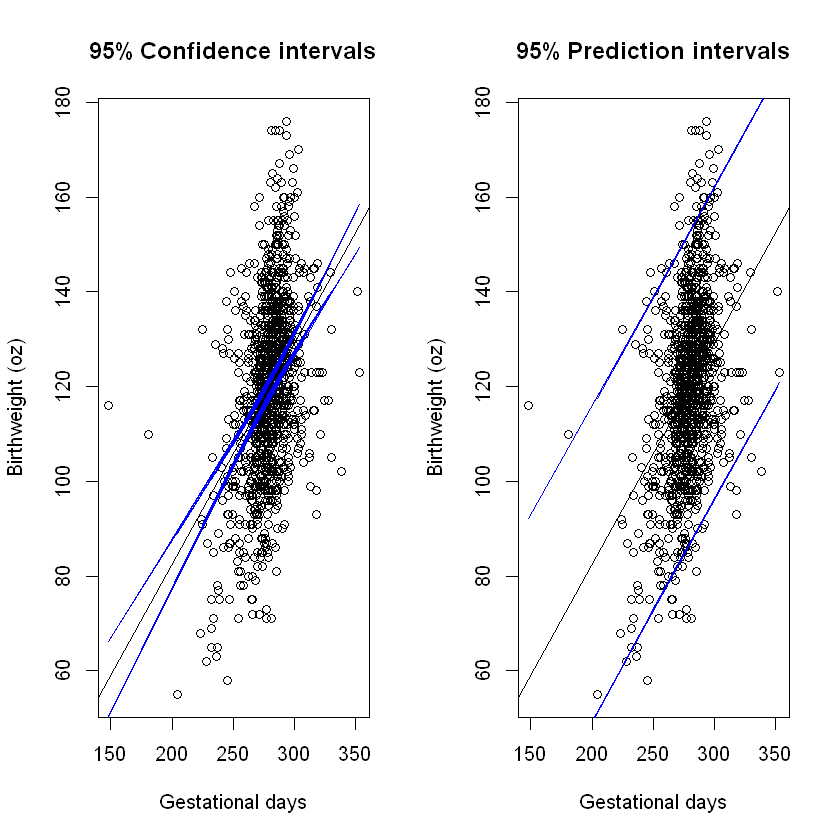

In [10]:
#Set the graphical space so that two plots are shown side-by-side in one row
par(mfrow=c(1,2))

#Confidence intervals for predicted values
plot(data$Gestational.Days, data$Birth.Weight, xlab="Gestational days", ylab="Birthweight (oz)", main="95% Confidence intervals")
abline(model1)

conf_interval<-predict(model1, newdata=data, interval="confidence", level=0.95)
lines(data$Gestational.Days, conf_interval[,2], col="blue")
lines(data$Gestational.Days, conf_interval[,3], col="blue")

#Reference ranges
plot(data$Gestational.Days, data$Birth.Weight, xlab="Gestational days", ylab="Birthweight (oz)", main="95% Prediction intervals")
abline(model1)

conf_interval<-predict(model1, newdata=data, interval="prediction", level=0.95)
lines(data$Gestational.Days, conf_interval[,2], col="blue")
lines(data$Gestational.Days, conf_interval[,3], col="blue")